In [1]:
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv('C:\\Users\\AZUS\Desktop\\stack-overflow-developer-survey-2020\\survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN



 Let's view the list of columns in the data frame


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

# 
It appears that short codes for questions are used as column names

We can refer to the schema file to see full text of each question. The schema files contains only
two columns: Column and QuestionText, so we can load it as Pandas Series with column as the index
and the Questiontext as the value

In [5]:
schema_fname = 'C:\\Users\\AZUS\\Desktop\\stack-overflow-developer-survey-2020\\survey_results_schema.csv'

In [6]:
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [7]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object


# 
We can now use schema_raw to retrieve the full question text for any column in survey_raw_df

In [8]:
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

## Data Preparation & Cleaning
While the survey responses contain a wealth of information, we'll limit our analysis to the following
areas:

* Demographics of the survey respondents & the global programming community
* Distribution of programming skills
* Employment-related information, preference & opinion

Let's select a subset of columns with the relevant data for our analysis


In [9]:
selected_columns = [
    # Demographics 
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [10]:
len(selected_columns)

20



Let's extract a copy of the data from these columns into a new data frame survey_df, which 
we can continue to modify further without affecting the original data frame.

In [11]:
survey_df = survey_raw_df[selected_columns].copy()

In [12]:
schema = schema_raw[selected_columns]


Let's view some basic information about the data frame

In [13]:
survey_df.shape

(64461, 20)

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
## converting some columns into numeric data types

In [16]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [17]:
## Basics statistics about the numeric columns

In [18]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with age column, as the min value is
1 and max value is 279. This is common issues with surveys: responses 
may contain invalid values due to accidental or intentonal errors while responding.
A simple fix would be ignore the rows where the value in the age column is higher than 100
years or lower thn 10 years as invalid survey responses
 

In [19]:
survey_df.drop(survey_df[survey_df.Age < 10].index,  inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index,  inplace=True)

# 
The same hold true for workweekhrs. Let's ignore entries where the value for the column 
is higher than 140 hours(~20 hours per day0

In [20]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index,  inplace=True)

In [21]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


# 
The gender column also allows picking multiple options, to simplify our analysis,
we will remove values containing more than option

In [22]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [23]:
import numpy as np

In [24]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [25]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [26]:
## Sample of rows from the data frame

In [27]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
16145,United States,41.0,Man,I never completed any formal education,NaN,Yes,12.0,15.0,15.0,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;K...,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,Data or business analyst;Database administrato...,40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,NaN
27005,Senegal,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,22.0,6.0,2.0,HTML/CSS;Java;JavaScript;Kotlin;PHP;SQL;TypeSc...,Dart;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Fairly important
6589,India,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,3.0,Bash/Shell/PowerShell;C;C++;Go;Java;JavaScript...,Go;JavaScript;Python;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",45.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
24551,United States,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,20.0,15.0,Bash/Shell/PowerShell;C#;JavaScript;Python;SQL...,Bash/Shell/PowerShell;C#;JavaScript;Kotlin;Pyt...,Once a year,Watch help / tutorial videos;Do other work and...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Very important
61767,Brazil,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
14803,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,5.0,2.0,HTML/CSS;JavaScript;TypeScript,NaN,Every few months,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",NaN,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",NaN,Very important
5538,Philippines,22.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,11.0,12.0,2.0,C#;HTML/CSS;JavaScript;Kotlin;PHP;Python,HTML/CSS;JavaScript;PHP;Python,Every few months,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, full-stack",63.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Fairly important
19338,United States,43.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,No,12.0,20.0,20.0,C#;JavaScript;SQL,C#;Java;JavaScript;SQL,Once every few years,Meditate;Play games;Visit Stack Overflow;Do ot...,"Independent contractor, freelancer, or self-em...","Developer, back-end",30.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Not at all important/not necessary
41232,Sri Lanka,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Java;JavaScript;PHP;Python;SQL;TypeScript,NaN,Every few months,Play games;Watch help / tutorial videos,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
9290,France,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",No,16.0,7.0,4.0,SQL,Python;R,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Database administrator;Developer, back-end;Eng...",40.0,Very sa

## Exploratory Analysis and Visualisation
Before we can ask interesting questions about the survey reponses, it would help to understand what 
the demographics i.e country,age, gneder.... of the respondents looks like

In [34]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country
Let's look at the number of countries from which there are responses in the survey, and plot the 10
countries with the highest number of responses

In [29]:
schema.Country

'Where do you live?'

In [30]:
survey_df.nunique()

Country                     183
Age                         105
Gender                        3
EdLevel                       9
UndergradMajor               12
Hobbyist                      2
Age1stCode                   61
YearsCode                    50
YearsCodePro                 50
LanguageWorkedWith        14169
LanguageDesireNextYear    16123
NEWLearn                      4
NEWStuck                    444
Employment                    7
DevType                    8213
WorkWeekHrs                 144
JobSat                        5
JobFactors                  230
NEWOvertime                   5
NEWEdImpt                     5
dtype: int64

# 
We can identify the country with the highest respondents using the value_counts() method

In [31]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

In [32]:
## Visualisation of the result using a bar chat


C:\Users\AZUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


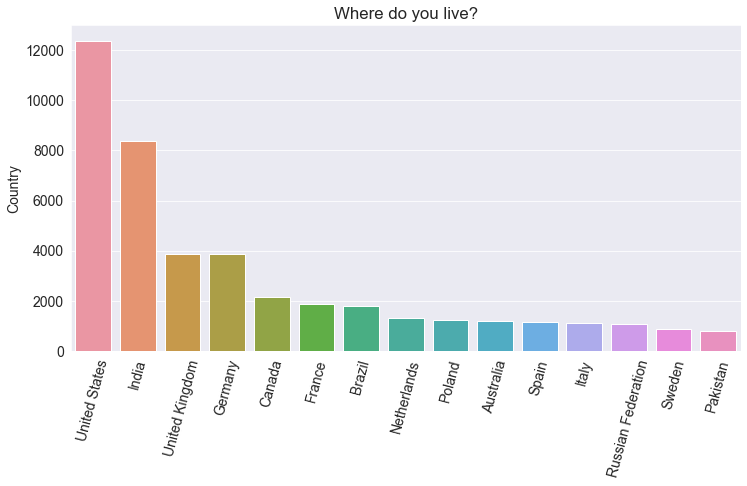

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries);

# 
It appears that a disproportionately high number of respondents are from USA and India- which
one might expect since these countries have the highest population(China excluded), and since
the Survey is English, which is the common language used by professionals in US, India & UK.
We can already see that the survey may not be representative of the entire programming community
especially from non-English countries

## Age
The distribution of the age of respondents is another important factor to look at,and we can use a 
histogram to visualize it

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

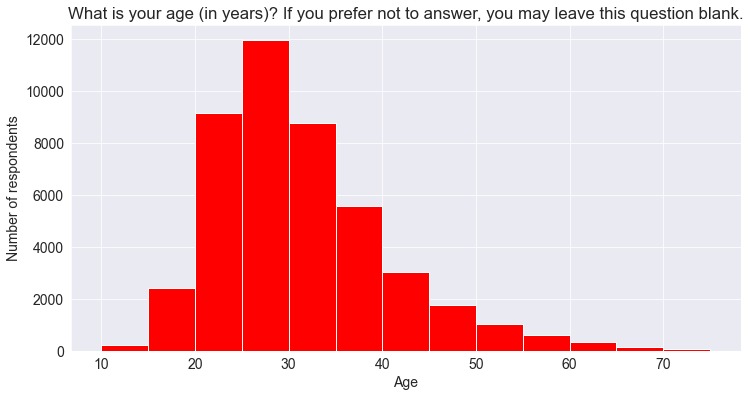

In [35]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='red')

# 
It appears that a large percentage of respondents are in the age range of 20-45, which is somewhat representative 
programming community in general,as a lot of young people have taken up computer as their field of study or
professiom in the last 20 years

## Gender
Let's look at the distribution of responses for the Gender, it's a well known fact that women and 
non-binary genders are underrepresented at programming community, so we might expect to 
see a skewed distribution here

In [36]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [37]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [38]:
## visualizing the result

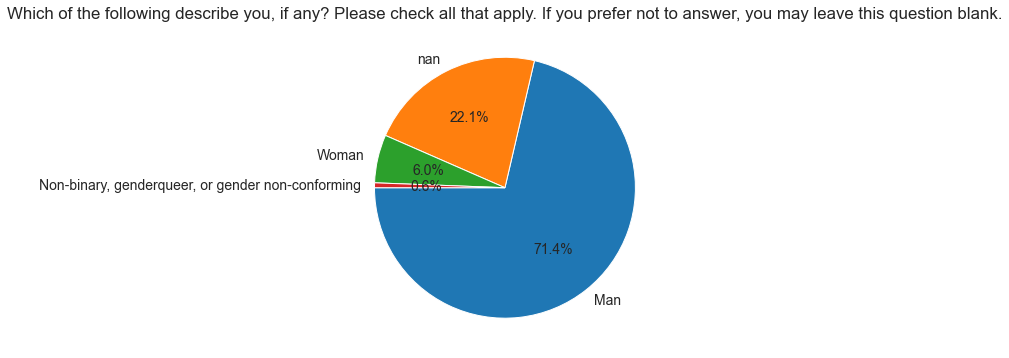

In [39]:
plt.figure(figsize=(12, 6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

## Education  Level
Formal education in computer science is often considered an important requirement of becoming a 
programmer. Let's see if this is indeed the case, especially since there are many free resources &
tutorials available online to learn programming. We'll use a horizontal bar plot to compare 
education levels of respondents

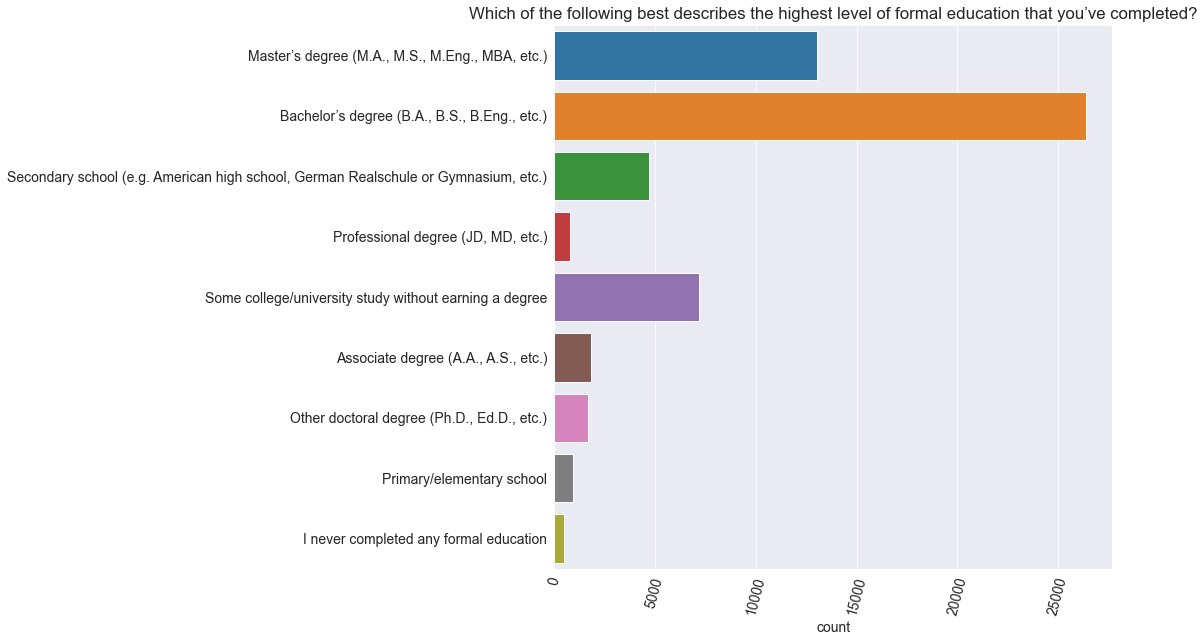

In [40]:
plt.figure(figsize=(10, 10))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None);

# 
It appears that over half of the respondents hold a bachelor or master's degree, so most
programmers definitely seem to have some collge education, although it's not clear from this
graph alone if they had a degree in computer science.

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages,
and sort by percentage values to make it easier to visualize the order.

In [41]:
schema.UndergradMajor

'What was your primary field of study?'

In [42]:
survey_df.UndergradMajor.value_counts()* 100 / survey_df.UndergradMajor.count()

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

In [43]:
schema.UndergradMajor

'What was your primary field of study?'

C:\Users\AZUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


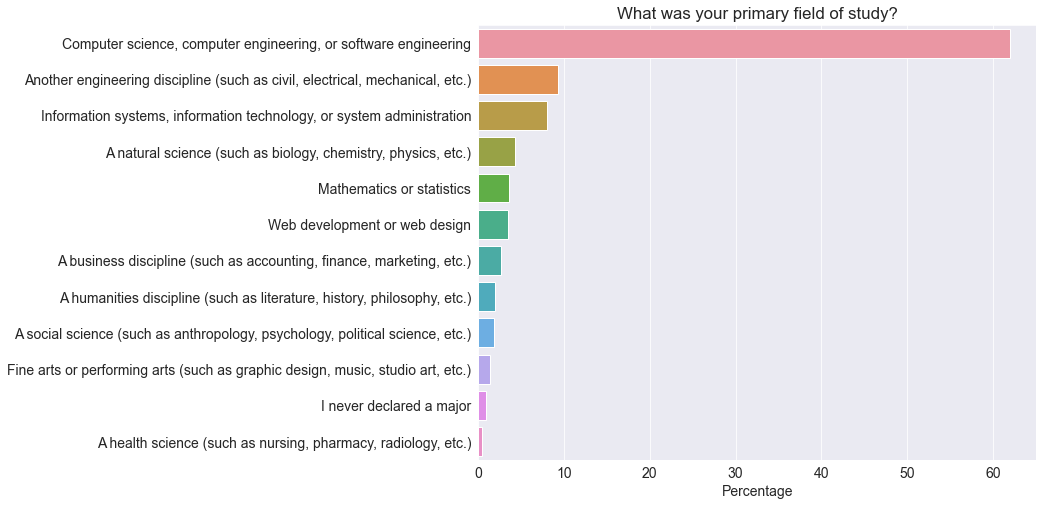

In [44]:
plt.figure(figsize=(10, 8))
undergrad_pct  = survey_df.UndergradMajor.value_counts()* 100 / survey_df.UndergradMajor.count()
sns.barplot(undergrad_pct, undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

#
It turns out that 40% of programmers holding a college degree have a field of study other than
computer science- which is very encouraging. This sems to suggest that while college education 
is helpful in general, you do not need to pursue a major in computer science to become a 
successful programmer

## Employment
Freelancing or contract work is a common choice among programmer, so it would be interesting to 
compare the braekdown between full time, part time & freelance work. 

In [ ]:
## visualization of data from Employment column

In [45]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentage')

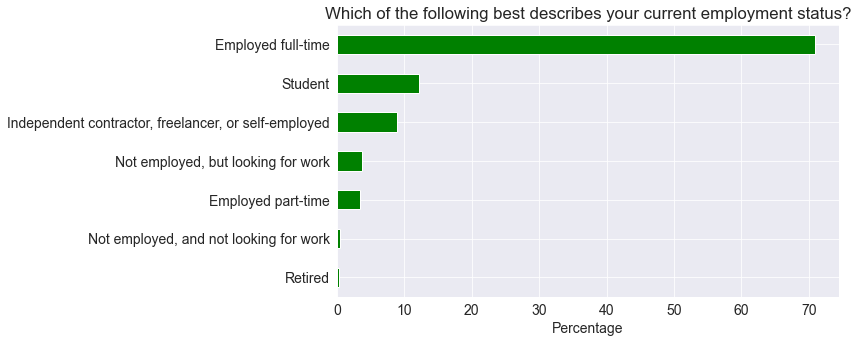

In [46]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage')

# 
It appears that close to 10% of respondents are freelancers

## Asking and Answering Questions
We've already gained several insights about the respondents and the programming community in
general, simply by exploring individual columns of the dataset. Let's ask some specific questions,
and try to answer them using data frame operations and interesting visualizatio

### Q: What are the most common languages used by developers older than 35?
To answer this we can use the Age column 


In [52]:
survey_df[survey_df.Age > 35]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,JavaScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
11,Spain,49.0,Man,Some college/university study without earning ...,Mathematics or statistics,No,42.0,7.0,7.0,HTML/CSS;JavaScript,HTML/CSS;JavaScript,Once every few years,Visit Stack Overflow,Employed full-time,"Designer;Developer, front-end",40.0,Very dissatisfied,Remote work options;Office environment or comp...,Rarely: 1-2 days per year or less,Somewhat important
12,Netherlands,53.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,35.0,20.0,C;JavaScript;Python,Python,Once every few years,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Designer;Developer, back-end",36.0,Very satisfied,Industry that I’d be working in;Financial perf...,Rarely: 1-2 days per year or less,Not at all important/not necessary
15,United Kingdom,45.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,37.0,23.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Go,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",50.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Often: 1-2 days per week or more,Fairly important
19,Spain,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,22.0,17.0,Java;JavaScript;SQL,Go,Once every few years,Meditate;Call a coworker or friend;Go for a wa...,Employed full-time,"Developer, desktop or enterprise applications",50.0,Neither satisfied nor dissatisfied,NaN,Often: 1-2 days per week or more,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64388,United States,56.0,Man,"Associate degree (A.A., A.S., etc.)","A health science (such as nursing, pharmacy, r...",Yes,50.0,2.0,NaN,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,NaN,Once a year,NaN,Retired,NaN,NaN,NaN,NaN,NaN,Very important
64392,Bangladesh,36.0,NaN,NaN,NaN,Yes,35.0,NaN,12.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,Critically important
64411,Belgium,44.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,15.0,NaN,NaN,NaN,HTML/CSS;Java;Kotlin;Python;SQL,NaN,Visit another developer community (please name):,NaN,NaN,NaN,NaN,NaN,NaN,Fairly important
64430,Israel,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Yes,35.0,3.0,NaN,HTML/CSS;JavaScript;Python,Haskell;HTML/CSS;JavaScript;Python;Rust,Every few months,Meditate;Play games;Call a coworker or friend;...,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,Fairly important


### In which country do developers work the highest number of hours per week? Consider  countries with more than 250 responses only


In [53]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=True)

In [54]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [55]:
high_response_countries_df

,WorkWeekHrs
Country,
Denmark,36.956679
Austria,37.167209
Philippines,37.315920
Nigeria,37.578125
Finland,37.836089
Argentina,37.911765
Portugal,38.381720
Brazil,38.409921
Kenya,38.728261


# 
The Asian countries like Iran, Chaina & Isreal have the highest working hours, followed by the United
States. However, there isn't too much variation overall and the average working hours seem to be 
around 40 hours per week

### How important is it to start young to build a career in programming?
Let's create scatter plot of Age vs YearsCodePro(years of coding experience) to answer 
this question

In [56]:
schema.YearsCodePro


'NOT including education, how many years have you coded professionally (as a part of your work)?'

C:\Users\AZUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


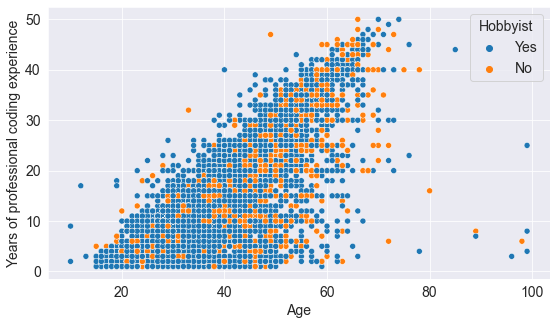

In [59]:
sns.scatterplot('Age', 'YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel('Years of professional coding experience');

# 
You can see all over the graph, which seems to indicate that you can start programming
professionally at any age. Also, many people who have been coding for several decades 
professionally also seem to enjoy it as a hobby.

We can also view the distribution of Age1stCode column to see when the respondents tried 
pogramming for the very first time

C:\Users\AZUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


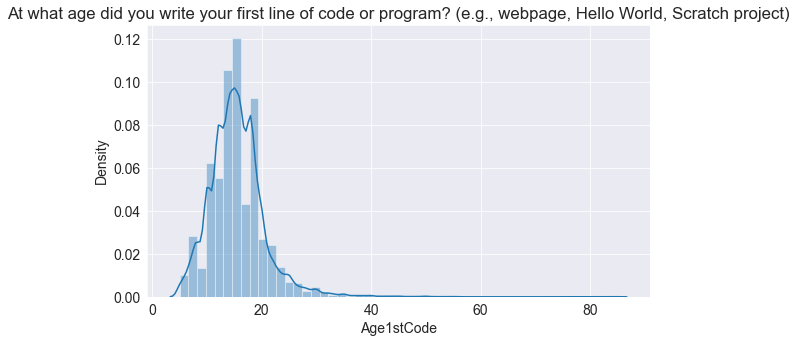

In [60]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode);

# 
As you might expect, most people seem to have some exposure to programming before the age of 40, 
but there are people of all ages and walks of life who are learning how to code

## Inferences and Conclusions

We,ve drawn many interesting inferences from the survey, here's a summary of the few of them:

* Based on the demographics of the survey respondents, we can infer that the survey is somewhat representative of the overall programming community, although it definitely has fewer responses from programmers in non-English-speaking countries and from women and non-binary genders 
* The programming communnity is not as diverse as it can be, although things are improving, we should take more to support & encourage memebers of underrepresented communities-whether it is in term of age, country, race, gender and otherwise
* Most programmers hold a college degree, although a fairly large percentage did not have computer science as their major in college, so a computer science degree is not compulsory for learning to code or building a career in programming
* A significant percentage of programmers either work part time or as freelancers, and this can be a great way to break into the field, especially when you are justing getting started.
* You can learn and start programming professionally at any age, and you're likely to have a long and fulfilling career if you also enjoy programming as a hobby